# LSTM CON TARGET CONTINUA 'Close'

## Librerie

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# MINUTI
## Close

In [3]:
# Scarica dati di Bitcoin al minuto
df = yf.download('BTC-USD', start='2024-11-29', end='2024-12-01', interval='1m')

# Controlla i dati scaricati
print(df.head())

[*********************100%***********************]  1 of 1 completed

Price                         Adj Close         Close          High  \
Ticker                          BTC-USD       BTC-USD       BTC-USD   
Datetime                                                              
2024-11-29 00:00:00+00:00  95675.898438  95675.898438  95675.898438   
2024-11-29 00:02:00+00:00  95695.421875  95695.421875  95695.421875   
2024-11-29 00:03:00+00:00  95655.210938  95655.210938  95655.210938   
2024-11-29 00:04:00+00:00  95639.703125  95639.703125  95639.703125   
2024-11-29 00:05:00+00:00  95646.179688  95646.179688  95646.179688   

Price                               Low          Open  Volume  
Ticker                          BTC-USD       BTC-USD BTC-USD  
Datetime                                                       
2024-11-29 00:00:00+00:00  95675.898438  95675.898438       0  
2024-11-29 00:02:00+00:00  95695.421875  95695.421875       0  
2024-11-29 00:03:00+00:00  95655.210938  95655.210938       0  
2024-11-29 00:04:00+00:00  95639.703125  95639.

In [4]:
# Selezione del dataframe
df = df[['Close']]
print(df.head())

Price                             Close
Ticker                          BTC-USD
Datetime                               
2024-11-29 00:00:00+00:00  95675.898438
2024-11-29 00:02:00+00:00  95695.421875
2024-11-29 00:03:00+00:00  95655.210938
2024-11-29 00:04:00+00:00  95639.703125
2024-11-29 00:05:00+00:00  95646.179688


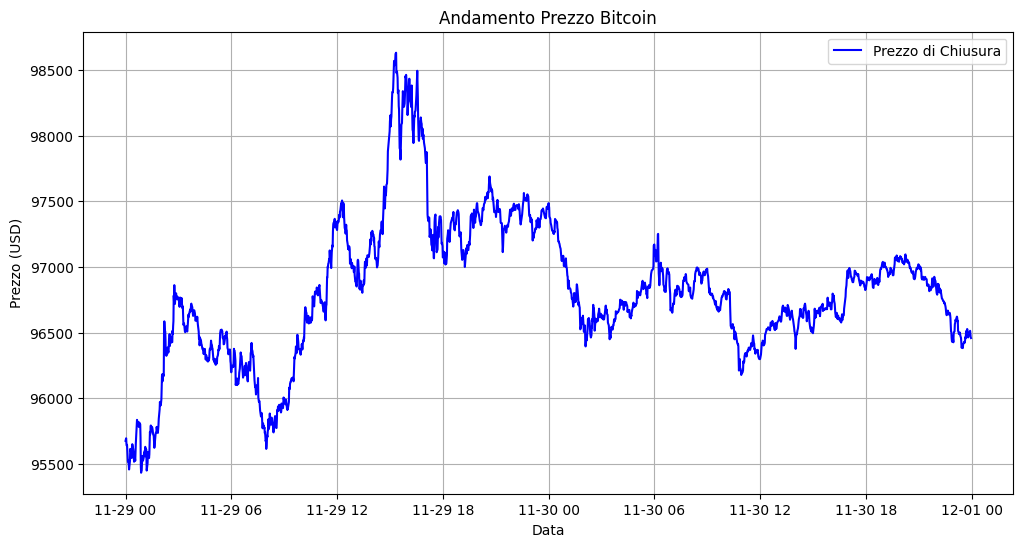

In [5]:
# Creiamo il grafico con Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Prezzo di Chiusura', color='b')

# Personalizziamo il grafico
plt.title('Andamento Prezzo Bitcoin')
plt.xlabel('Data')
plt.ylabel('Prezzo (USD)')
plt.legend()
plt.grid(True)

# Mostriamo il grafico
plt.show()

### pre-processing - modellazione - training

In [6]:
''' MODELLO SEMPLICE
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

def create_dataset(dataset, look_back=60):
    X, Y = [], []
    for i in range(look_back, len(dataset)):
        X.append(dataset[i-look_back:i, 0])
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

look_back = 60  # Utilizziamo 60 giorni precedenti per prevedere il prossimo
X, Y = create_dataset(scaled_data, look_back)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test))
'''

" MODELLO SEMPLICE\nscaler = MinMaxScaler(feature_range=(0, 1))\nscaled_data = scaler.fit_transform(df.values)\n\ndef create_dataset(dataset, look_back=60):\n    X, Y = [], []\n    for i in range(look_back, len(dataset)):\n        X.append(dataset[i-look_back:i, 0])\n        Y.append(dataset[i, 0])\n    return np.array(X), np.array(Y)\n\nlook_back = 60  # Utilizziamo 60 giorni precedenti per prevedere il prossimo\nX, Y = create_dataset(scaled_data, look_back)\n\ntrain_size = int(len(X) * 0.8)\nX_train, X_test = X[:train_size], X[train_size:]\nY_train, Y_test = Y[:train_size], Y[train_size:]\n\nX_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))\nX_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))\n\nmodel = Sequential()\nmodel.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))\nmodel.add(LSTM(units=50))\nmodel.add(Dense(1))\n\nmodel.compile(optimizer='adam', loss='mean_squared_error')\nhistory = model.fit(X_train, Y_train, ep

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

def create_dataset(dataset, look_back=60):
    X, Y = [], []
    for i in range(look_back, len(dataset)):
        X.append(dataset[i-look_back:i, 0])
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

look_back = 60  # Utilizziamo 60 giorni precedenti per prevedere il prossimo
X, Y = create_dataset(scaled_data, look_back)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [8]:
model = Sequential()
# Primo strato LSTM con return_sequences=True per impilare un altro strato LSTM
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Aggiungi dropout per prevenire overfitting
# Secondo strato LSTM
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
# Strato di output
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/20


/Users/sebastianolucchetti/Desktop/PROGETTO/DATA_MINING/DATA_MINING/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0676 - val_loss: 7.0636e-04
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0043 - val_loss: 4.4577e-04
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0034 - val_loss: 3.5221e-04
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0036 - val_loss: 4.2518e-04
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0032 - val_loss: 3.2547e-04
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0032 - val_loss: 5.0338e-04
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0027 - val_loss: 5.0871e-04
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0028 - val_loss: 3.0789e-04
Epoch 9/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0026 - val_loss: 3.2380e-04
Epoch 10/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0023 - val_loss: 2.9625e-04
Epoch 11/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0022 - val_loss: 2.6516e-04
Epoch 12/20
53/53 ━━━━━━━━━━━━

### Previsioni sul test

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
MSE: 3667.010759294741
Root Mean Squared Error: 60.555848266659936
Mean Absolute Percentage Error: 0.05%


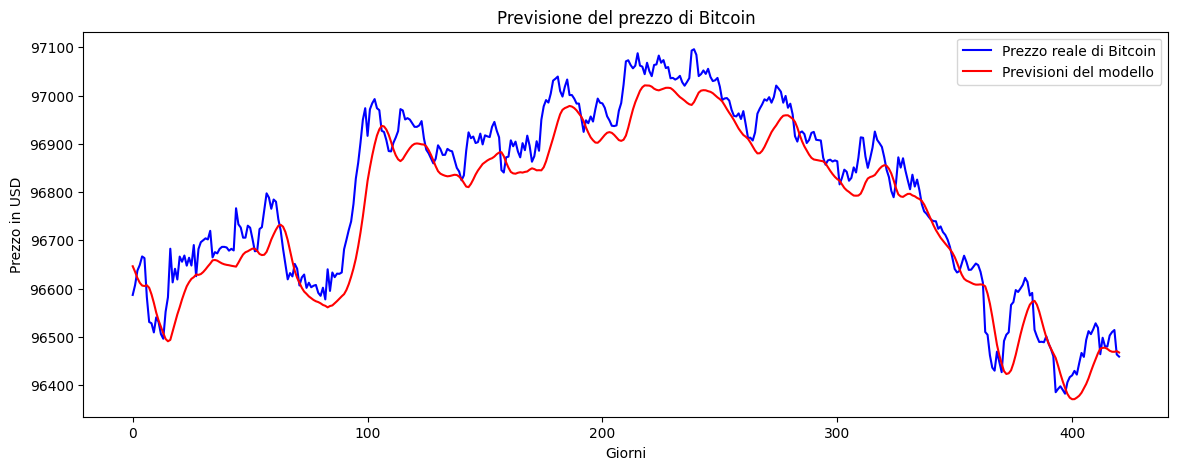

In [9]:
# Previsione sui dati di test
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
Y_test_actual = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Calcoliamo l'errore medio quadratico
mse = mean_squared_error(Y_test_actual, predictions)
print(f'MSE: {mse}')
rmse = np.sqrt(mean_squared_error(Y_test_actual, predictions))
mape = mean_absolute_percentage_error(Y_test_actual, predictions) * 100
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape:.2f}%')

# Grafico delle previsioni vs valori reali
plt.figure(figsize=(14,5))
plt.plot(Y_test_actual, color='blue', label='Prezzo reale di Bitcoin')
plt.plot(predictions, color='red', label='Previsioni del modello')
plt.title('Previsione del prezzo di Bitcoin')
plt.xlabel('Giorni')
plt.ylabel('Prezzo in USD')
plt.legend()
plt.show()

### Previsione su nuovi dati 

In [10]:
# Definizione del parametro seq_length (lunghezza delle sequenze temporali)
seq_length = 60  # Assicurati che sia lo stesso valore usato durante l'addestramento del modello

# ... codice esistente ...

# 1. Scarichiamo i dati relativi a un giorno specifico
# Scarichiamo i dati
new_data = yf.download('BTC-USD', start="2024-11-30", end="2024-12-02", interval='1m')
new_data = new_data[['Close']]
print("Dati scaricati:")
print(new_data)

# 2. Preprocessamento dei dati
# Normalizziamo i dati in base allo scaler già usato durante l'addestramento
# Assicurati di scalare tutte le colonne necessarie
scaler_features = MinMaxScaler()
scaled_features = scaler_features.fit_transform(new_data[['Close']].values)

# Creiamo la sequenza per l'input del modello
def create_single_sequence(data, seq_length=60):
    return np.array([data[-seq_length:]])

# Verifica se ci sono abbastanza dati per creare una sequenza
if len(scaled_features) >= seq_length:
    new_sequence = create_single_sequence(scaled_features, seq_length)
    print("Sequenza preparata per il modello (prima del reshape):", new_sequence.shape)
    
    # Aggiustiamo la forma per il modello
    new_sequence = new_sequence.reshape(1, seq_length, 1)  # Cambiato a 5 per le 5 caratteristiche
    print("Sequenza preparata per il modello (dopo il reshape):", new_sequence.shape)
else:
    print(f"Non ci sono abbastanza dati per creare una sequenza (richiesti: {seq_length}, presenti: {len(scaled_features)}).")

# 3. Predizione con il modello
if len(scaled_features) >= seq_length:
    prediction = model.predict(new_sequence)
    print("Forma della previsione:", prediction.shape)
    
    # Denormalizziamo la previsione per ottenere il valore reale
    predicted_close = scaler.inverse_transform(prediction)[0, 0]
    
    # Valore reale del `Close` del giorno successivo
    actual_close = new_data['Close'].iloc[-1]
    
    # Risultati
    print("Risultati:")
    print(f"Valore Close predetto: {predicted_close}")
    print(f"Valore Close reale: {actual_close}")
    print(f"Errore assoluto: {abs(predicted_close - actual_close)}")
else:
    print("Non è possibile effettuare una predizione con i dati disponibili.")

[*********************100%***********************]  1 of 1 completed

Dati scaricati:
Price                             Close
Ticker                          BTC-USD
Datetime                               
2024-11-30 00:00:00+00:00  97486.304688
2024-11-30 00:02:00+00:00  97451.421875
2024-11-30 00:03:00+00:00  97384.140625
2024-11-30 00:06:00+00:00  97366.359375
2024-11-30 00:07:00+00:00  97336.500000
...                                 ...
2024-12-01 23:54:00+00:00  97309.656250
2024-12-01 23:55:00+00:00  97311.453125
2024-12-01 23:56:00+00:00  97359.414062
2024-12-01 23:57:00+00:00  97335.484375
2024-12-01 23:58:00+00:00  97287.140625

[2123 rows x 1 columns]
Sequenza preparata per il modello (prima del reshape): (1, 60, 1)
Sequenza preparata per il modello (dopo il reshape): (1, 60, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Forma della previsione: (1, 1)
Risultati:
Valore Close predetto: 97695.25
Valore Close reale: Ticker
BTC-USD    97287.140625
Name: 2024-12-01 23:58:00+00:00, dtype: float64
Errore assoluto: Ticker
BTC-USD    408.109375
Name: 2024-1

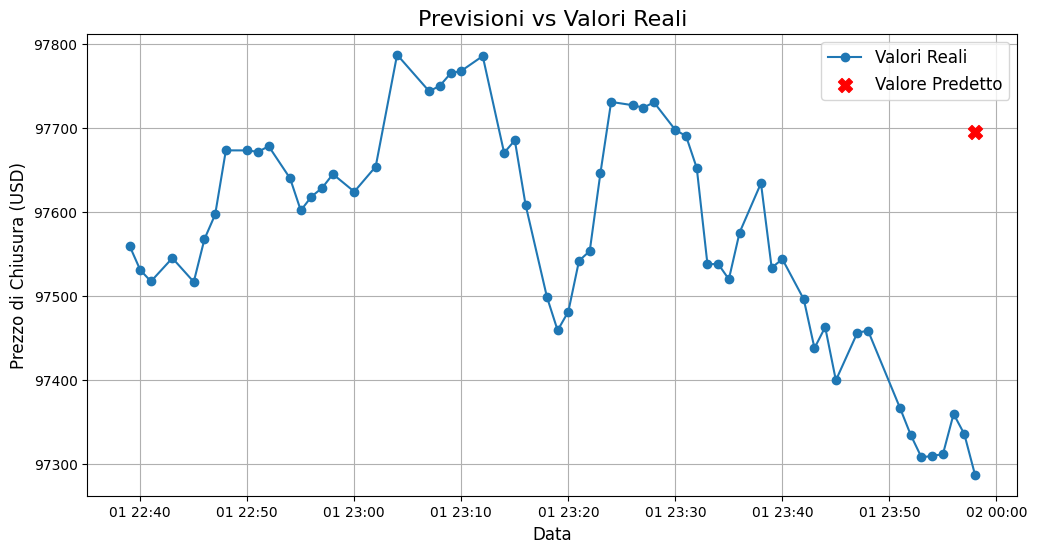

In [11]:
import matplotlib.pyplot as plt

def plot_predictions(new_data, predicted_close, seq_length):
    """
    Visualizza un grafico per confrontare le previsioni del modello con i valori reali.

    Args:
        new_data (pd.DataFrame): Dati originali scaricati con yfinance.
        predicted_close (float): Valore Close predetto dal modello.
        seq_length (int): Lunghezza della sequenza temporale.
    """
    # Creiamo una lista di indici per le previsioni
    prediction_date = new_data.index[-1]  # La data della previsione
    actual_date = new_data.index[-2]     # Data del valore reale usato per confronto

    # Costruiamo il grafico
    plt.figure(figsize=(12, 6))

    # Plot dei valori reali
    plt.plot(new_data.index[-seq_length-1:], new_data['Close'][-seq_length-1:], label="Valori Reali", marker='o')

    # Aggiungiamo la previsione al grafico
    plt.scatter(prediction_date, predicted_close, color='r', label="Valore Predetto", zorder=5, marker='X', s=100)

    # Dettagli del grafico
    plt.title('Previsioni vs Valori Reali', fontsize=16)
    plt.xlabel('Data', fontsize=12)
    plt.ylabel('Prezzo di Chiusura (USD)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

# Chiamata alla funzione con i dati disponibili
plot_predictions(new_data, predicted_close, seq_length)

In [12]:
def evaluate_predictions(real_values, predicted_values):
    """
    Calcola i parametri di valutazione delle predizioni.

    Args:
        real_values (np.array): Valori reali del Close.
        predicted_values (np.array): Valori predetti dal modello.

    Returns:
        dict: Un dizionario con MAE, MSE, RMSE e MAPE.
    """
    # Calcolo delle metriche
    mae = mean_absolute_error(real_values, predicted_values)
    mse = mean_squared_error(real_values, predicted_values)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((real_values - predicted_values) / real_values)) * 100  # In percentuale

    # Ritorna i risultati in un dizionario
    return {
        "Mean Absolute Error (MAE)": mae,
        "Mean Squared Error (MSE)": mse,
        "Root Mean Squared Error (RMSE)": rmse,
        "Mean Absolute Percentage Error (MAPE)": mape
    }

# Esempio di utilizzo
# Supponiamo che tu abbia una lista di valori reali e predetti:
real_values = np.array([new_data['Close'].iloc[-2]])  # Valore Close reale del giorno precedente
predicted_values = np.array([predicted_close])       # Valore predetto

# Calcoliamo le metriche
metrics = evaluate_predictions(real_values, predicted_values)

# Stampa delle metriche
print("Metriche di Valutazione delle Predizioni:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

Metriche di Valutazione delle Predizioni:
Mean Absolute Error (MAE): 359.77
Mean Squared Error (MSE): 129431.30
Root Mean Squared Error (RMSE): 359.77
Mean Absolute Percentage Error (MAPE): 0.37


## Close - Open - High - Low - Volume

In [13]:
# Scarica dati di Bitcoin al minuto
df = yf.download('BTC-USD', start='2024-11-28', end='2024-12-01', interval='1m')

# Controlla i dati scaricati
print(df.head())

[*********************100%***********************]  1 of 1 completed

Price                         Adj Close         Close          High  \
Ticker                          BTC-USD       BTC-USD       BTC-USD   
Datetime                                                              
2024-11-28 00:00:00+00:00  95948.742188  95948.742188  95948.742188   
2024-11-28 00:02:00+00:00  95896.171875  95896.171875  95896.171875   
2024-11-28 00:03:00+00:00  95904.828125  95904.828125  95904.828125   
2024-11-28 00:04:00+00:00  95954.015625  95954.015625  95954.015625   
2024-11-28 00:06:00+00:00  96023.710938  96023.710938  96023.710938   

Price                               Low          Open   Volume  
Ticker                          BTC-USD       BTC-USD  BTC-USD  
Datetime                                                        
2024-11-28 00:00:00+00:00  95948.742188  95948.742188        0  
2024-11-28 00:02:00+00:00  95896.171875  95896.171875        0  
2024-11-28 00:03:00+00:00  95904.828125  95904.828125        0  
2024-11-28 00:04:00+00:00  95954.015625  

In [14]:
df = df[['Close', 'Open', 'Low', 'High', 'Volume']]
print(df.head())

Price                             Close          Open           Low  \
Ticker                          BTC-USD       BTC-USD       BTC-USD   
Datetime                                                              
2024-11-28 00:00:00+00:00  95948.742188  95948.742188  95948.742188   
2024-11-28 00:02:00+00:00  95896.171875  95896.171875  95896.171875   
2024-11-28 00:03:00+00:00  95904.828125  95904.828125  95904.828125   
2024-11-28 00:04:00+00:00  95954.015625  95954.015625  95954.015625   
2024-11-28 00:06:00+00:00  96023.710938  96023.710938  96023.710938   

Price                              High   Volume  
Ticker                          BTC-USD  BTC-USD  
Datetime                                          
2024-11-28 00:00:00+00:00  95948.742188        0  
2024-11-28 00:02:00+00:00  95896.171875        0  
2024-11-28 00:03:00+00:00  95904.828125        0  
2024-11-28 00:04:00+00:00  95954.015625  6758400  
2024-11-28 00:06:00+00:00  96023.710938        0  


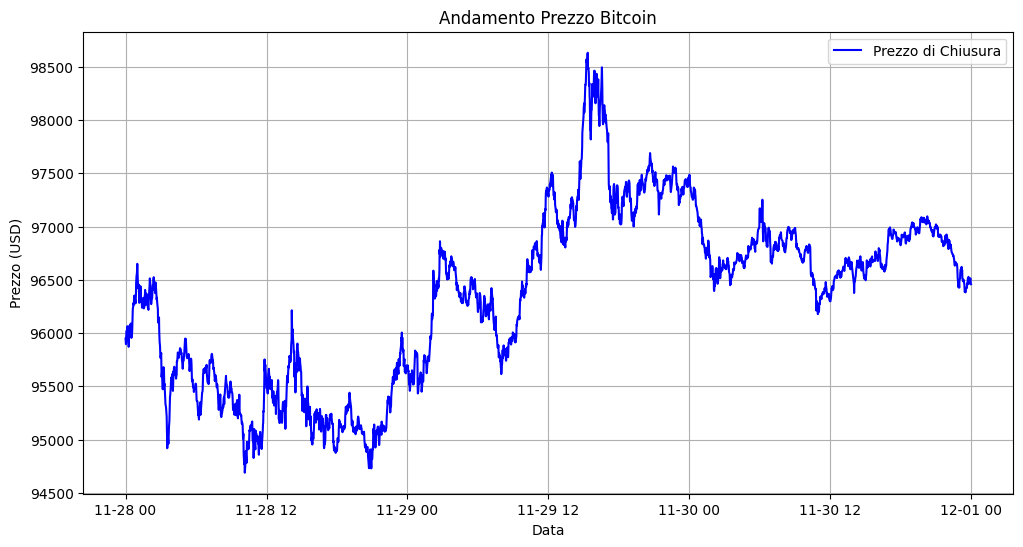

In [15]:
# Creiamo il grafico con Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Prezzo di Chiusura', color='b')

# Personalizziamo il grafico
plt.title('Andamento Prezzo Bitcoin')
plt.xlabel('Data')
plt.ylabel('Prezzo (USD)')
plt.legend()
plt.grid(True)

# Mostriamo il grafico
plt.show()

### pre-processing - modellazione - training

In [16]:
# 3. Seleziona le features e il target includendo il Volume
features = ['Open', 'High', 'Low', 'Volume', 'Close']
target = 'Close'

data = df[features]

# 4. Scala le features utilizzando MinMaxScaler
scaler_features = MinMaxScaler()
scaled_features = scaler_features.fit_transform(data[features])

# 5. Scala il target utilizzando MinMaxScaler (Prezzo di Chiusura)
scaler_target = MinMaxScaler()
scaled_target = scaler_target.fit_transform(data[[target]])

# 6. Definisci la lunghezza della sequenza per l'input della LSTM
sequence_length = 60  # Usiamo gli ultimi 60 minuti per predire il prossimo minuto

# 7. Crea le sequenze per l'input (X) e il target (y)
X = []
y = []

for i in range(sequence_length, len(scaled_features)):
    X.append(scaled_features[i-sequence_length:i])
    y.append(scaled_target[i])  # Il prezzo di chiusura al tempo i

# Converti le liste in array numpy
X = np.array(X)
y = np.array(y)

# 8. Suddividi il dataset in training set e test set (80% training, 20% test)
train_size = int(len(X) * 0.8)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [17]:
# 9. Costruisci il modello LSTM
model = Sequential()
# Primo strato LSTM con return_sequences=True per impilare un altro strato LSTM
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Aggiungi dropout per prevenire overfitting
# Secondo strato LSTM
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
# Strato di output
model.add(Dense(units=1))

# 10. Compila il modello
model.compile(optimizer='adam', loss='mean_squared_error')

# 11. Addestra il modello
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/20


/Users/sebastianolucchetti/Desktop/PROGETTO/DATA_MINING/DATA_MINING/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0640 - val_loss: 4.2612e-04
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0039 - val_loss: 3.4907e-04
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0031 - val_loss: 2.9466e-04
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0031 - val_loss: 6.4857e-04
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0031 - val_loss: 2.5738e-04
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0026 - val_loss: 2.7399e-04
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0026 - val_loss: 2.4717e-04
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0025 - val_loss: 2.6760e-04
Epoch 9/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0024 - val_loss: 4.7328e-04
Epoch 10/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0020 - val_loss: 6.8511e-04
Epoch 11/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0023 - val_loss: 2.2697e-04
Epoch 12/20
40/40 ━━━━━━━━━━━━

### previsione sul test

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
MSE: 3137.7951830823276
Root Mean Squared Error: 56.01602612719263
Mean Absolute Percentage Error: 0.04%


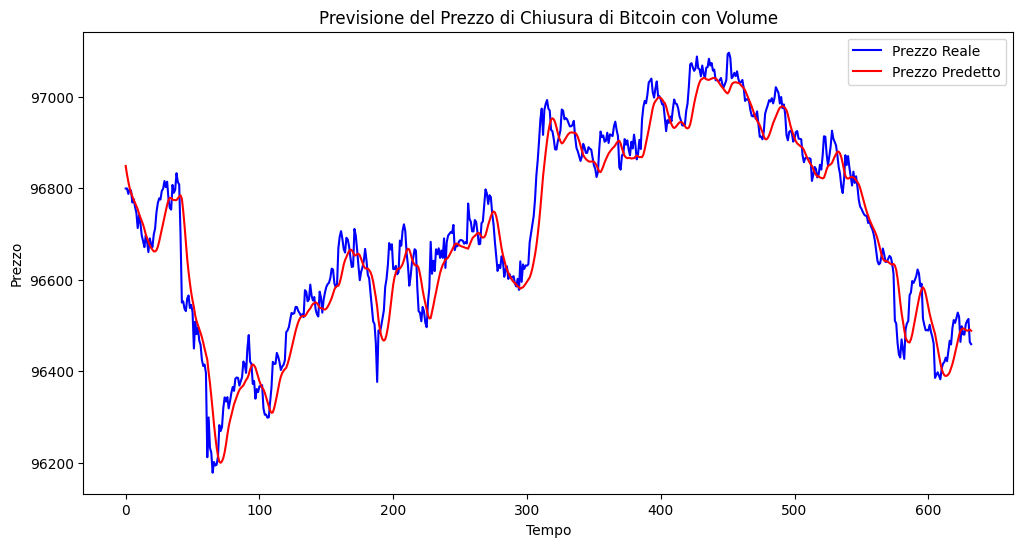

In [18]:
# 12. Effettua previsioni sul test set
predictions = model.predict(X_test)

# 13. Inversa la trasformazione per ottenere i valori originali
predictions_inversed = scaler_target.inverse_transform(predictions)
y_test_inversed = scaler_target.inverse_transform(y_test)

# 14. Valuta le performance del modello
mse = mean_squared_error(y_test_inversed, predictions_inversed)
print(f'MSE: {mse}')
rmse = np.sqrt(mean_squared_error(y_test_inversed, predictions_inversed))
mape = mean_absolute_percentage_error(y_test_inversed, predictions_inversed) * 100
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape:.2f}%')

# 15. Visualizza i risultati
plt.figure(figsize=(12,6))
plt.plot(y_test_inversed, color='blue', label='Prezzo Reale')
plt.plot(predictions_inversed, color='red', label='Prezzo Predetto')
plt.title('Previsione del Prezzo di Chiusura di Bitcoin con Volume')
plt.xlabel('Tempo')
plt.ylabel('Prezzo')
plt.legend()
plt.show()

### Previsione su dati nuovi

In [19]:
# Definizione del parametro seq_length (lunghezza delle sequenze temporali)
seq_length = 60  # Assicurati che sia lo stesso valore usato durante l'addestramento del modello

# ... codice esistente ...

# 1. Scarichiamo i dati relativi a un giorno specifico
# Scarichiamo i dati
new_data = yf.download('BTC-USD', start="2024-11-30", end="2024-12-02", interval='1m')
print("Dati scaricati:")
print(new_data)

# 2. Preprocessamento dei dati
# Normalizziamo i dati in base allo scaler già usato durante l'addestramento
# Assicurati di scalare tutte le colonne necessarie
scaler_features = MinMaxScaler()
scaled_features = scaler_features.fit_transform(new_data[['Open', 'High', 'Low', 'Volume', 'Close']].values)

# Creiamo la sequenza per l'input del modello
def create_single_sequence(data, seq_length=60):
    return np.array([data[-seq_length:]])

# Verifica se ci sono abbastanza dati per creare una sequenza
if len(scaled_features) >= seq_length:
    new_sequence = create_single_sequence(scaled_features, seq_length)
    print("Sequenza preparata per il modello (prima del reshape):", new_sequence.shape)
    
    # Aggiustiamo la forma per il modello
    new_sequence = new_sequence.reshape(1, seq_length, 5)  # Cambiato a 5 per le 5 caratteristiche
    print("Sequenza preparata per il modello (dopo il reshape):", new_sequence.shape)
else:
    print(f"Non ci sono abbastanza dati per creare una sequenza (richiesti: {seq_length}, presenti: {len(scaled_features)}).")

# 3. Predizione con il modello
if len(scaled_features) >= seq_length:
    prediction = model.predict(new_sequence)
    print("Forma della previsione:", prediction.shape)
    
    # Denormalizziamo la previsione per ottenere il valore reale
    predicted_close = scaler.inverse_transform(prediction)[0, 0]
    
    # Valore reale del `Close` del giorno successivo
    actual_close = new_data['Close'].iloc[-1]
    
    # Risultati
    print("Risultati:")
    print(f"Valore Close predetto: {predicted_close}")
    print(f"Valore Close reale: {actual_close}")
    print(f"Errore assoluto: {abs(predicted_close - actual_close)}")
else:
    print("Non è possibile effettuare una predizione con i dati disponibili.")

[*********************100%***********************]  1 of 1 completed

Dati scaricati:
Price                         Adj Close         Close          High  \
Ticker                          BTC-USD       BTC-USD       BTC-USD   
Datetime                                                              
2024-11-30 00:00:00+00:00  97486.304688  97486.304688  97486.304688   
2024-11-30 00:02:00+00:00  97451.421875  97451.421875  97451.421875   
2024-11-30 00:03:00+00:00  97384.140625  97384.140625  97384.140625   
2024-11-30 00:06:00+00:00  97366.359375  97366.359375  97366.359375   
2024-11-30 00:07:00+00:00  97336.500000  97336.500000  97336.500000   
...                                 ...           ...           ...   
2024-12-01 23:54:00+00:00  97309.656250  97309.656250  97309.656250   
2024-12-01 23:55:00+00:00  97311.453125  97311.453125  97311.453125   
2024-12-01 23:56:00+00:00  97359.414062  97359.414062  97359.414062   
2024-12-01 23:57:00+00:00  97335.484375  97335.484375  97335.484375   
2024-12-01 23:58:00+00:00  97287.140625  97287.140625  97287.

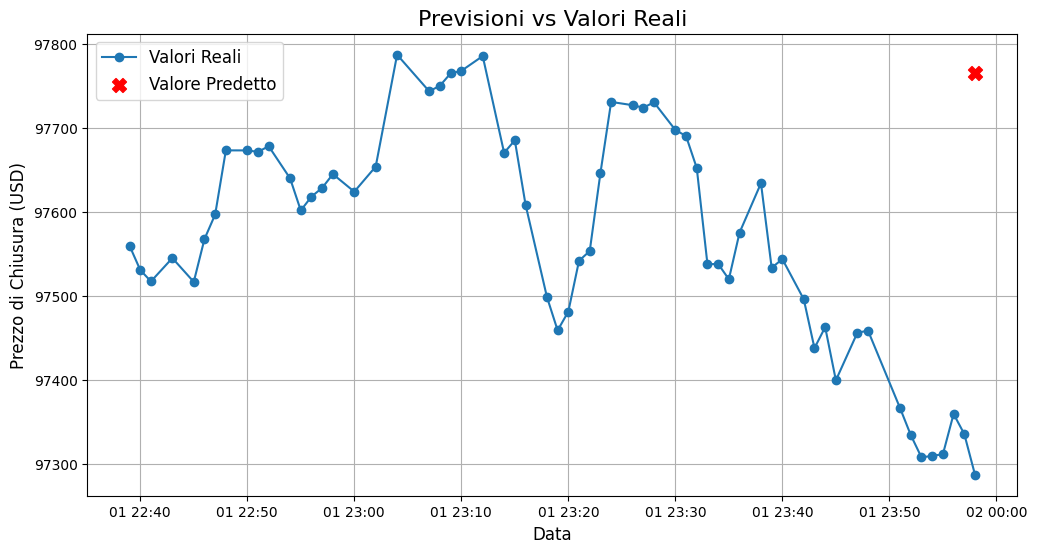

In [20]:
def plot_predictions(new_data, predicted_close, seq_length):
    """
    Visualizza un grafico per confrontare le previsioni del modello con i valori reali.

    Args:
        new_data (pd.DataFrame): Dati originali scaricati con yfinance.
        predicted_close (float): Valore Close predetto dal modello.
        seq_length (int): Lunghezza della sequenza temporale.
    """
    # Creiamo una lista di indici per le previsioni
    prediction_date = new_data.index[-1]  # La data della previsione
    actual_date = new_data.index[-2]     # Data del valore reale usato per confronto

    # Costruiamo il grafico
    plt.figure(figsize=(12, 6))

    # Plot dei valori reali
    plt.plot(new_data.index[-seq_length-1:], new_data['Close'][-seq_length-1:], label="Valori Reali", marker='o')

    # Aggiungiamo la previsione al grafico
    plt.scatter(prediction_date, predicted_close, color='r', label="Valore Predetto", zorder=5, marker='X', s=100)

    # Dettagli del grafico
    plt.title('Previsioni vs Valori Reali', fontsize=16)
    plt.xlabel('Data', fontsize=12)
    plt.ylabel('Prezzo di Chiusura (USD)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

# Chiamata alla funzione con i dati disponibili
plot_predictions(new_data, predicted_close, seq_length)

In [21]:
def evaluate_predictions(real_values, predicted_values):
    """
    Calcola i parametri di valutazione delle predizioni.

    Args:
        real_values (np.array): Valori reali del Close.
        predicted_values (np.array): Valori predetti dal modello.

    Returns:
        dict: Un dizionario con MAE, MSE, RMSE e MAPE.
    """
    # Calcolo delle metriche
    mae = mean_absolute_error(real_values, predicted_values)
    mse = mean_squared_error(real_values, predicted_values)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((real_values - predicted_values) / real_values)) * 100  # In percentuale

    # Ritorna i risultati in un dizionario
    return {
        "Mean Absolute Error (MAE)": mae,
        "Mean Squared Error (MSE)": mse,
        "Root Mean Squared Error (RMSE)": rmse,
        "Mean Absolute Percentage Error (MAPE)": mape
    }

# Esempio di utilizzo
# Supponiamo che tu abbia una lista di valori reali e predetti:
real_values = np.array([new_data['Close'].iloc[-2]])  # Valore Close reale del giorno precedente
predicted_values = np.array([predicted_close])       # Valore predetto

# Calcoliamo le metriche
metrics = evaluate_predictions(real_values, predicted_values)

# Stampa delle metriche
print("Metriche di Valutazione delle Predizioni:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

Metriche di Valutazione delle Predizioni:
Mean Absolute Error (MAE): 429.48
Mean Squared Error (MSE): 184456.83
Root Mean Squared Error (RMSE): 429.48
Mean Absolute Percentage Error (MAPE): 0.44


# GIORNI
## Close

In [22]:
# 1. Scarica i dati storici di Bitcoin con intervallo di 1 minuto per gli ultimi 7 giorni
df = yf.download(tickers='BTC-USD', start='2017-01-01', end='2024-10-30')
print(df.head())

[*********************100%***********************]  1 of 1 completed

Price         Adj Close        Close         High          Low         Open  \
Ticker          BTC-USD      BTC-USD      BTC-USD      BTC-USD      BTC-USD   
Date                                                                          
2017-01-01   998.325012   998.325012  1003.080017   958.698975   963.658020   
2017-01-02  1021.750000  1021.750000  1031.390015   996.702026   998.617004   
2017-01-03  1043.839966  1043.839966  1044.079956  1021.599976  1021.599976   
2017-01-04  1154.729980  1154.729980  1159.420044  1044.400024  1044.400024   
2017-01-05  1013.380005  1013.380005  1191.099976   910.416992  1156.729980   

Price          Volume  
Ticker        BTC-USD  
Date                   
2017-01-01  147775008  
2017-01-02  222184992  
2017-01-03  185168000  
2017-01-04  344945984  
2017-01-05  510199008  


In [23]:
# Selezione del dataframe
df = df[['Close']]
print(df.head())

Price             Close
Ticker          BTC-USD
Date                   
2017-01-01   998.325012
2017-01-02  1021.750000
2017-01-03  1043.839966
2017-01-04  1154.729980
2017-01-05  1013.380005


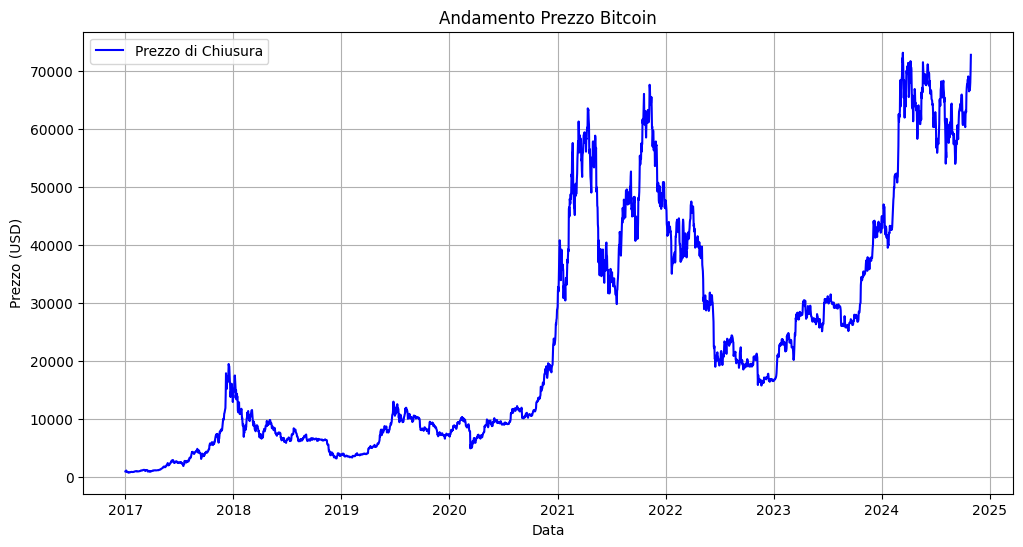

In [24]:
# Creiamo il grafico con Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Prezzo di Chiusura', color='b')

# Personalizziamo il grafico
plt.title('Andamento Prezzo Bitcoin')
plt.xlabel('Data')
plt.ylabel('Prezzo (USD)')
plt.legend()
plt.grid(True)

# Mostriamo il grafico
plt.show()

### pre-processing - modellazione - training

In [25]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

def create_dataset(dataset, look_back=60):
    X, Y = [], []
    for i in range(look_back, len(dataset)):
        X.append(dataset[i-look_back:i, 0])
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

look_back = 90  # Utilizziamo 60 giorni precedenti per prevedere il prossimo
X, Y = create_dataset(scaled_data, look_back)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [26]:
model = Sequential()
# Primo strato LSTM con return_sequences=True per impilare un altro strato LSTM
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Aggiungi dropout per prevenire overfitting
# Secondo strato LSTM
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
# Strato di output
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/20


/Users/sebastianolucchetti/Desktop/PROGETTO/DATA_MINING/DATA_MINING/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0170 - val_loss: 0.0029
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0020 - val_loss: 0.0077
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0014 - val_loss: 0.0027
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0014 - val_loss: 0.0021
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0015 - val_loss: 0.0025
Epoch 9/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 10/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0015 - val_loss: 0.0022
Epoch 11/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0012 - val_loss: 0.0030
Epoch 12/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0014 - val_l

### Previsioni e grafico

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
MSE: 4036803.5219663903
Root Mean Squared Error: 2009.179813248777
Mean Absolute Percentage Error: 2.83%


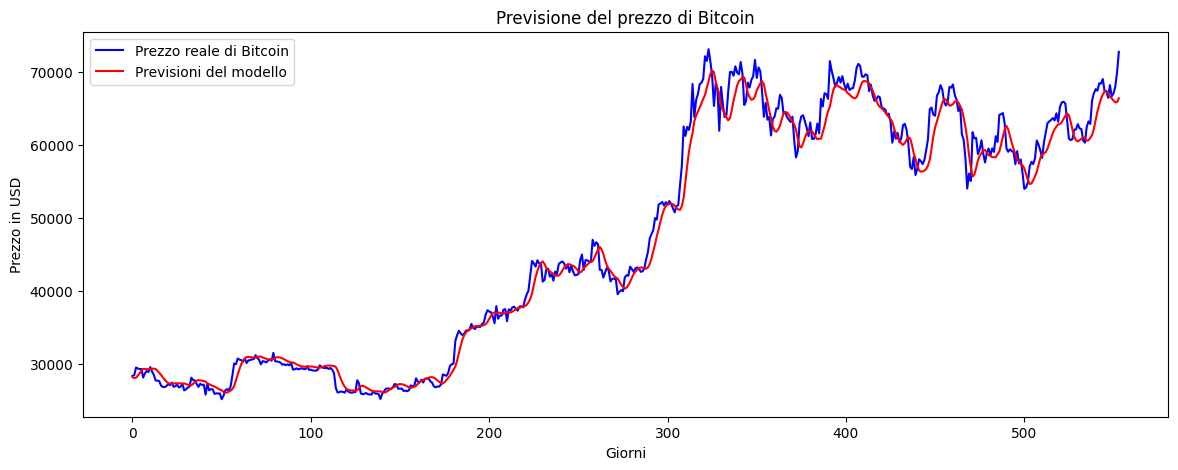

In [27]:
# Previsione sui dati di test
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
Y_test_actual = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Calcoliamo l'errore medio quadratico
mse = mean_squared_error(Y_test_actual, predictions)
print(f'MSE: {mse}')
rmse = np.sqrt(mean_squared_error(Y_test_actual, predictions))
mape = mean_absolute_percentage_error(Y_test_actual, predictions) * 100
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape:.2f}%')

# Grafico delle previsioni vs valori reali
plt.figure(figsize=(14,5))
plt.plot(Y_test_actual, color='blue', label='Prezzo reale di Bitcoin')
plt.plot(predictions, color='red', label='Previsioni del modello')
plt.title('Previsione del prezzo di Bitcoin')
plt.xlabel('Giorni')
plt.ylabel('Prezzo in USD')
plt.legend()
plt.show()

### previsione su nuovi dati

In [28]:
# Definizione del parametro seq_length (lunghezza delle sequenze temporali)
seq_length = 60  # Assicurati che sia lo stesso valore usato durante l'addestramento del modello

# ... codice esistente ...

# 1. Scarichiamo i dati relativi a un giorno specifico
# Scarichiamo i dati
new_data = yf.download('BTC-USD', start="2024-09-30", end="2024-11-30")
new_data = new_data[['Close']]
print("Dati scaricati:")
print(new_data)

# 2. Preprocessamento dei dati
# Normalizziamo i dati in base allo scaler già usato durante l'addestramento
# Assicurati di scalare tutte le colonne necessarie
scaler_features = MinMaxScaler()
scaled_features = scaler_features.fit_transform(new_data[['Close']].values)

# Creiamo la sequenza per l'input del modello
def create_single_sequence(data, seq_length=60):
    return np.array([data[-seq_length:]])

# Verifica se ci sono abbastanza dati per creare una sequenza
if len(scaled_features) >= seq_length:
    new_sequence = create_single_sequence(scaled_features, seq_length)
    print("Sequenza preparata per il modello (prima del reshape):", new_sequence.shape)
    
    # Aggiustiamo la forma per il modello
    new_sequence = new_sequence.reshape(1, seq_length, 1)  # Cambiato a 5 per le 5 caratteristiche
    print("Sequenza preparata per il modello (dopo il reshape):", new_sequence.shape)
else:
    print(f"Non ci sono abbastanza dati per creare una sequenza (richiesti: {seq_length}, presenti: {len(scaled_features)}).")

# 3. Predizione con il modello
if len(scaled_features) >= seq_length:
    prediction = model.predict(new_sequence)
    print("Forma della previsione:", prediction.shape)
    
    # Denormalizziamo la previsione per ottenere il valore reale
    predicted_close = scaler.inverse_transform(prediction)[0, 0]
    
    # Valore reale del `Close` del giorno successivo
    actual_close = new_data['Close'].iloc[-1]
    
    # Risultati
    print("Risultati:")
    print(f"Valore Close predetto: {predicted_close}")
    print(f"Valore Close reale: {actual_close}")
    print(f"Errore assoluto: {abs(predicted_close - actual_close)}")
else:
    print("Non è possibile effettuare una predizione con i dati disponibili.")

[*********************100%***********************]  1 of 1 completed

Dati scaricati:
Price              Close
Ticker           BTC-USD
Date                    
2024-09-30  63329.500000
2024-10-01  60837.007812
2024-10-02  60632.785156
2024-10-03  60759.402344
2024-10-04  62067.476562
...                  ...
2024-11-25  93102.296875
2024-11-26  91985.320312
2024-11-27  95962.531250
2024-11-28  95652.468750
2024-11-29  97461.523438

[61 rows x 1 columns]
Sequenza preparata per il modello (prima del reshape): (1, 60, 1)
Sequenza preparata per il modello (dopo il reshape): (1, 60, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Forma della previsione: (1, 1)
Risultati:
Valore Close predetto: 64976.765625
Valore Close reale: Ticker
BTC-USD    97461.523438
Name: 2024-11-29 00:00:00, dtype: float64
Errore assoluto: Ticker
BTC-USD    32484.757812
Name: 2024-11-29 00:00:00, dtype: float64


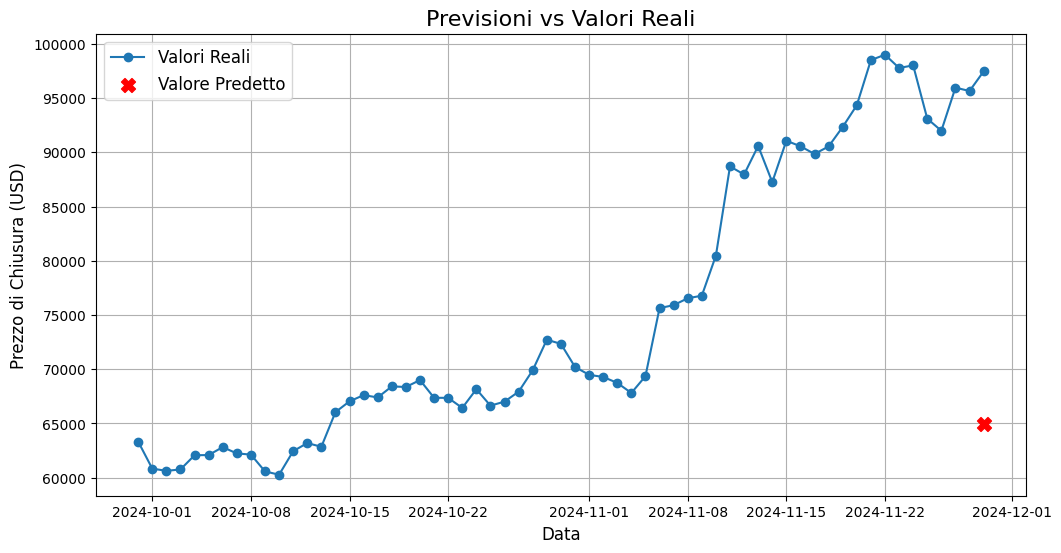

In [29]:
def plot_predictions(new_data, predicted_close, seq_length):
    """
    Visualizza un grafico per confrontare le previsioni del modello con i valori reali.

    Args:
        new_data (pd.DataFrame): Dati originali scaricati con yfinance.
        predicted_close (float): Valore Close predetto dal modello.
        seq_length (int): Lunghezza della sequenza temporale.
    """
    # Creiamo una lista di indici per le previsioni
    prediction_date = new_data.index[-1]  # La data della previsione
    actual_date = new_data.index[-2]     # Data del valore reale usato per confronto

    # Costruiamo il grafico
    plt.figure(figsize=(12, 6))

    # Plot dei valori reali
    plt.plot(new_data.index[-seq_length-1:], new_data['Close'][-seq_length-1:], label="Valori Reali", marker='o')

    # Aggiungiamo la previsione al grafico
    plt.scatter(prediction_date, predicted_close, color='r', label="Valore Predetto", zorder=5, marker='X', s=100)

    # Dettagli del grafico
    plt.title('Previsioni vs Valori Reali', fontsize=16)
    plt.xlabel('Data', fontsize=12)
    plt.ylabel('Prezzo di Chiusura (USD)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

# Chiamata alla funzione con i dati disponibili
plot_predictions(new_data, predicted_close, seq_length)

In [30]:
def evaluate_predictions(real_values, predicted_values):
    """
    Calcola i parametri di valutazione delle predizioni.

    Args:
        real_values (np.array): Valori reali del Close.
        predicted_values (np.array): Valori predetti dal modello.

    Returns:
        dict: Un dizionario con MAE, MSE, RMSE e MAPE.
    """
    # Calcolo delle metriche
    mae = mean_absolute_error(real_values, predicted_values)
    mse = mean_squared_error(real_values, predicted_values)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((real_values - predicted_values) / real_values)) * 100  # In percentuale

    # Ritorna i risultati in un dizionario
    return {
        "Mean Absolute Error (MAE)": mae,
        "Mean Squared Error (MSE)": mse,
        "Root Mean Squared Error (RMSE)": rmse,
        "Mean Absolute Percentage Error (MAPE)": mape
    }

# Esempio di utilizzo
# Supponiamo che tu abbia una lista di valori reali e predetti:
real_values = np.array([new_data['Close'].iloc[-2]])  # Valore Close reale del giorno precedente
predicted_values = np.array([predicted_close])       # Valore predetto

# Calcoliamo le metriche
metrics = evaluate_predictions(real_values, predicted_values)

# Stampa delle metriche
print("Metriche di Valutazione delle Predizioni:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

Metriche di Valutazione delle Predizioni:
Mean Absolute Error (MAE): 30675.70
Mean Squared Error (MSE): 940998762.21
Root Mean Squared Error (RMSE): 30675.70
Mean Absolute Percentage Error (MAPE): 32.07


## Close - Open - High - Low - Volume

In [31]:
# 1. Scarica i dati storici di Bitcoin con intervallo di 1 minuto per gli ultimi 7 giorni
df = yf.download(tickers='BTC-USD', start='2017-01-01', end='2024-10-30')
print(df.head())

[*********************100%***********************]  1 of 1 completed

Price         Adj Close        Close         High          Low         Open  \
Ticker          BTC-USD      BTC-USD      BTC-USD      BTC-USD      BTC-USD   
Date                                                                          
2017-01-01   998.325012   998.325012  1003.080017   958.698975   963.658020   
2017-01-02  1021.750000  1021.750000  1031.390015   996.702026   998.617004   
2017-01-03  1043.839966  1043.839966  1044.079956  1021.599976  1021.599976   
2017-01-04  1154.729980  1154.729980  1159.420044  1044.400024  1044.400024   
2017-01-05  1013.380005  1013.380005  1191.099976   910.416992  1156.729980   

Price          Volume  
Ticker        BTC-USD  
Date                   
2017-01-01  147775008  
2017-01-02  222184992  
2017-01-03  185168000  
2017-01-04  344945984  
2017-01-05  510199008  


In [32]:
df = df[['Close', 'Open', 'Low', 'High', 'Volume']]
print(df.head())

Price             Close         Open          Low         High     Volume
Ticker          BTC-USD      BTC-USD      BTC-USD      BTC-USD    BTC-USD
Date                                                                     
2017-01-01   998.325012   963.658020   958.698975  1003.080017  147775008
2017-01-02  1021.750000   998.617004   996.702026  1031.390015  222184992
2017-01-03  1043.839966  1021.599976  1021.599976  1044.079956  185168000
2017-01-04  1154.729980  1044.400024  1044.400024  1159.420044  344945984
2017-01-05  1013.380005  1156.729980   910.416992  1191.099976  510199008


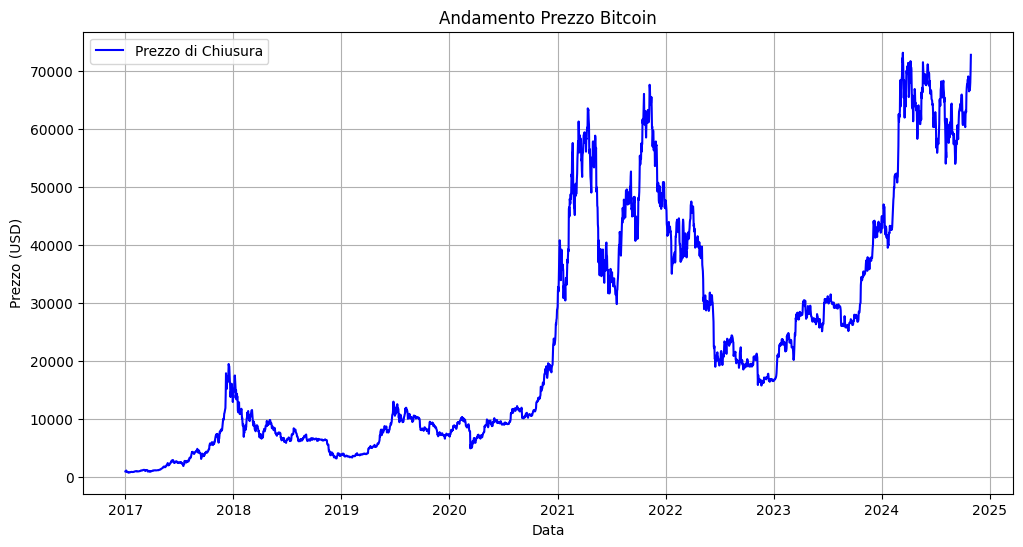

In [33]:
# Creiamo il grafico con Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Prezzo di Chiusura', color='b')

# Personalizziamo il grafico
plt.title('Andamento Prezzo Bitcoin')
plt.xlabel('Data')
plt.ylabel('Prezzo (USD)')
plt.legend()
plt.grid(True)

# Mostriamo il grafico
plt.show()

### pre-processing - modellazione - training

In [34]:
# 3. Seleziona le features e il target includendo il Volume
features = ['Open', 'High', 'Low', 'Volume', 'Close']
target = 'Close'

data = df[features]

# 4. Scala le features utilizzando MinMaxScaler
scaler_features = MinMaxScaler()
scaled_features = scaler_features.fit_transform(data[features])

# 5. Scala il target utilizzando MinMaxScaler (Prezzo di Chiusura)
scaler_target = MinMaxScaler()
scaled_target = scaler_target.fit_transform(data[[target]])

# 6. Definisci la lunghezza della sequenza per l'input della LSTM
sequence_length = 60  # Usiamo gli ultimi 60 minuti per predire il prossimo minuto

# 7. Crea le sequenze per l'input (X) e il target (y)
X = []
y = []

for i in range(sequence_length, len(scaled_features)):
    X.append(scaled_features[i-sequence_length:i])
    y.append(scaled_target[i])  # Il prezzo di chiusura al tempo i

# Converti le liste in array numpy
X = np.array(X)
y = np.array(y)

# 8. Suddividi il dataset in training set e test set (80% training, 20% test)
train_size = int(len(X) * 0.8)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [35]:
# 9. Costruisci il modello LSTM
model = Sequential()
# Primo strato LSTM con return_sequences=True per impilare un altro strato LSTM
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Aggiungi dropout per prevenire overfitting
# Secondo strato LSTM
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
# Strato di output
model.add(Dense(units=1))

# 10. Compila il modello
model.compile(optimizer='adam', loss='mean_squared_error')

# 11. Addestra il modello
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20


/Users/sebastianolucchetti/Desktop/PROGETTO/DATA_MINING/DATA_MINING/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0326 - val_loss: 0.0036
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0019 - val_loss: 0.0032
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0016 - val_loss: 0.0040
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 9/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0016 - val_loss: 0.0022
Epoch 10/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 11/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0014 - val_loss: 0.0024
Epoch 12/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0013 - val_l

### previsione sul test

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
MSE: 6289996.459410572
Root Mean Squared Error: 2507.986534934064
Mean Absolute Percentage Error: 3.42%


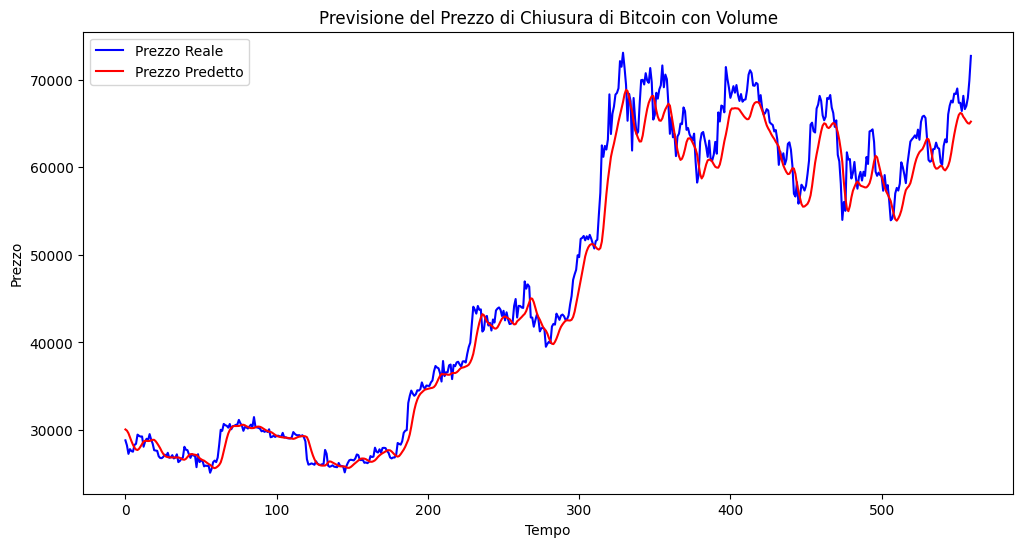

In [36]:
# 12. Effettua previsioni sul test set
predictions = model.predict(X_test)

# 13. Inversa la trasformazione per ottenere i valori originali
predictions_inversed = scaler_target.inverse_transform(predictions)
y_test_inversed = scaler_target.inverse_transform(y_test)

# 14. Valuta le performance del modello
mse = mean_squared_error(y_test_inversed, predictions_inversed)
print(f'MSE: {mse}')
rmse = np.sqrt(mean_squared_error(y_test_inversed, predictions_inversed))
mape = mean_absolute_percentage_error(y_test_inversed, predictions_inversed) * 100
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape:.2f}%')

# 15. Visualizza i risultati
plt.figure(figsize=(12,6))
plt.plot(y_test_inversed, color='blue', label='Prezzo Reale')
plt.plot(predictions_inversed, color='red', label='Prezzo Predetto')
plt.title('Previsione del Prezzo di Chiusura di Bitcoin con Volume')
plt.xlabel('Tempo')
plt.ylabel('Prezzo')
plt.legend()
plt.show()

### Previsione su dati nuovi

In [38]:
# Definizione del parametro seq_length (lunghezza delle sequenze temporali)
seq_length = 60  # Assicurati che sia lo stesso valore usato durante l'addestramento del modello

# ... codice esistente ...

# 1. Scarichiamo i dati relativi a un giorno specifico
# Scarichiamo i dati
new_data = yf.download('BTC-USD', start="2024-09-30", end="2024-11-30")
print("Dati scaricati:")
print(new_data)

# 2. Preprocessamento dei dati
# Normalizziamo i dati in base allo scaler già usato durante l'addestramento
# Assicurati di scalare tutte le colonne necessarie
scaler_features = MinMaxScaler()
scaled_features = scaler_features.fit_transform(new_data[['Open', 'High', 'Low', 'Volume', 'Close']].values)

# Creiamo la sequenza per l'input del modello
def create_single_sequence(data, seq_length=60):
    return np.array([data[-seq_length:]])

# Verifica se ci sono abbastanza dati per creare una sequenza
if len(scaled_features) >= seq_length:
    new_sequence = create_single_sequence(scaled_features, seq_length)
    print("Sequenza preparata per il modello (prima del reshape):", new_sequence.shape)
    
    # Aggiustiamo la forma per il modello
    new_sequence = new_sequence.reshape(1, seq_length, 5)  # Cambiato a 5 per le 5 caratteristiche
    print("Sequenza preparata per il modello (dopo il reshape):", new_sequence.shape)
else:
    print(f"Non ci sono abbastanza dati per creare una sequenza (richiesti: {seq_length}, presenti: {len(scaled_features)}).")

# 3. Predizione con il modello
if len(scaled_features) >= seq_length:
    prediction = model.predict(new_sequence)
    print("Forma della previsione:", prediction.shape)
    
    # Denormalizziamo la previsione per ottenere il valore reale
    predicted_close = scaler.inverse_transform(prediction)[0, 0]
    
    # Valore reale del `Close` del giorno successivo
    actual_close = new_data['Close'].iloc[-1]
    
    # Risultati
    print("Risultati:")
    print(f"Valore Close predetto: {predicted_close}")
    print(f"Valore Close reale: {actual_close}")
    print(f"Errore assoluto: {abs(predicted_close - actual_close)}")
else:
    print("Non è possibile effettuare una predizione con i dati disponibili.")

[*********************100%***********************]  1 of 1 completed

Dati scaricati:
Price          Adj Close         Close          High           Low  \
Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2024-09-30  63329.500000  63329.500000  65635.054688  62873.617188   
2024-10-01  60837.007812  60837.007812  64110.980469  60189.277344   
2024-10-02  60632.785156  60632.785156  62357.687500  59996.949219   
2024-10-03  60759.402344  60759.402344  61469.039062  59878.804688   
2024-10-04  62067.476562  62067.476562  62465.992188  60459.941406   
...                  ...           ...           ...           ...   
2024-11-25  93102.296875  93102.296875  98935.031250  92642.914062   
2024-11-26  91985.320312  91985.320312  94991.750000  90770.812500   
2024-11-27  95962.531250  95962.531250  97361.179688  91778.664062   
2024-11-28  95652.468750  95652.468750  96650.203125  94677.351562   
2024-11-29  97461.523438  97461.523438  98693.171875  95407.882812   

Pri

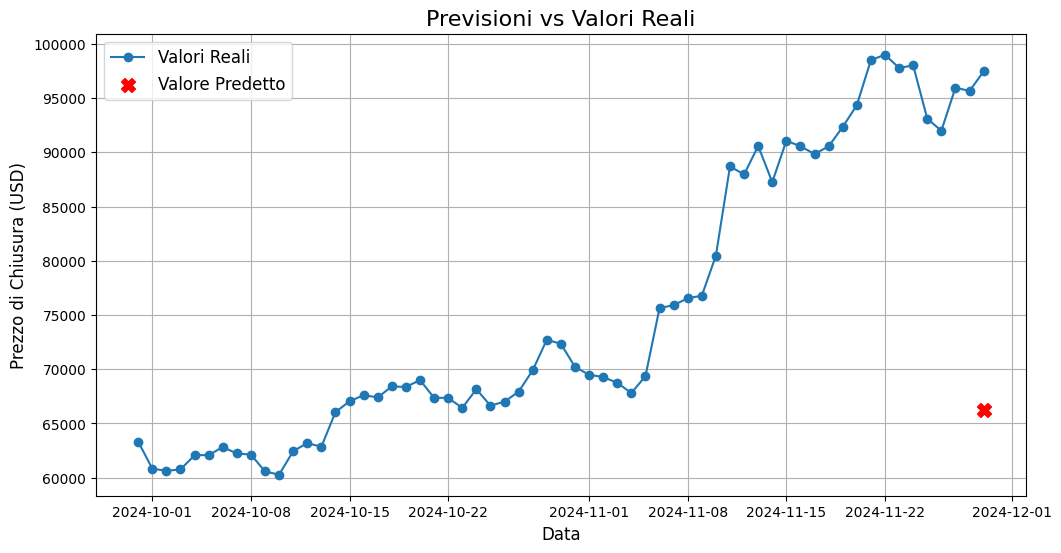

In [39]:
def plot_predictions(new_data, predicted_close, seq_length):
    """
    Visualizza un grafico per confrontare le previsioni del modello con i valori reali.

    Args:
        new_data (pd.DataFrame): Dati originali scaricati con yfinance.
        predicted_close (float): Valore Close predetto dal modello.
        seq_length (int): Lunghezza della sequenza temporale.
    """
    # Creiamo una lista di indici per le previsioni
    prediction_date = new_data.index[-1]  # La data della previsione
    actual_date = new_data.index[-2]     # Data del valore reale usato per confronto

    # Costruiamo il grafico
    plt.figure(figsize=(12, 6))

    # Plot dei valori reali
    plt.plot(new_data.index[-seq_length-1:], new_data['Close'][-seq_length-1:], label="Valori Reali", marker='o')

    # Aggiungiamo la previsione al grafico
    plt.scatter(prediction_date, predicted_close, color='r', label="Valore Predetto", zorder=5, marker='X', s=100)

    # Dettagli del grafico
    plt.title('Previsioni vs Valori Reali', fontsize=16)
    plt.xlabel('Data', fontsize=12)
    plt.ylabel('Prezzo di Chiusura (USD)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

# Chiamata alla funzione con i dati disponibili
plot_predictions(new_data, predicted_close, seq_length)

In [40]:
def evaluate_predictions(real_values, predicted_values):
    """
    Calcola i parametri di valutazione delle predizioni.

    Args:
        real_values (np.array): Valori reali del Close.
        predicted_values (np.array): Valori predetti dal modello.

    Returns:
        dict: Un dizionario con MAE, MSE, RMSE e MAPE.
    """
    # Calcolo delle metriche
    mae = mean_absolute_error(real_values, predicted_values)
    mse = mean_squared_error(real_values, predicted_values)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((real_values - predicted_values) / real_values)) * 100  # In percentuale

    # Ritorna i risultati in un dizionario
    return {
        "Mean Absolute Error (MAE)": mae,
        "Mean Squared Error (MSE)": mse,
        "Root Mean Squared Error (RMSE)": rmse,
        "Mean Absolute Percentage Error (MAPE)": mape
    }

# Esempio di utilizzo
# Supponiamo che tu abbia una lista di valori reali e predetti:
real_values = np.array([new_data['Close'].iloc[-2]])  # Valore Close reale del giorno precedente
predicted_values = np.array([predicted_close])       # Valore predetto

# Calcoliamo le metriche
metrics = evaluate_predictions(real_values, predicted_values)

# Stampa delle metriche
print("Metriche di Valutazione delle Predizioni:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

Metriche di Valutazione delle Predizioni:
Mean Absolute Error (MAE): 29368.71
Mean Squared Error (MSE): 862521182.13
Root Mean Squared Error (RMSE): 29368.71
Mean Absolute Percentage Error (MAPE): 30.70
